# Separation of variables

In [2]:
t, x, y, n = var('t x y n')
palette = [(215/255, 0/255, 132/255), (255/255, 1/255, 73/255), (255/255, 121/255, 1/255), (255/255, 210/255, 0/255)]
cool_palette = [(0/255, 150/255, 173/255), (0/255, 200/255, 146/255)]

## Nitric oxide therapy

During many medical treatments, it's helpful for patients to breathe oxygen with a little nitric oxide mixed in. Unfortunately, nitric oxide reacts with oxygen, forming toxic nitrogen dioxide. Say you mix some nitric oxide into a bottle of oxygen. You want to know $x(t)$, the amount of nitric oxide left in the bottle after $t$ seconds.

The slowest step in the reaction involves two nitric oxide molecules colliding, so the reaction rate is proportional to $x(t)^2$. Let's say the rate is

$$x'(t) = -\tfrac{1}{1500} x(t)^2.$$

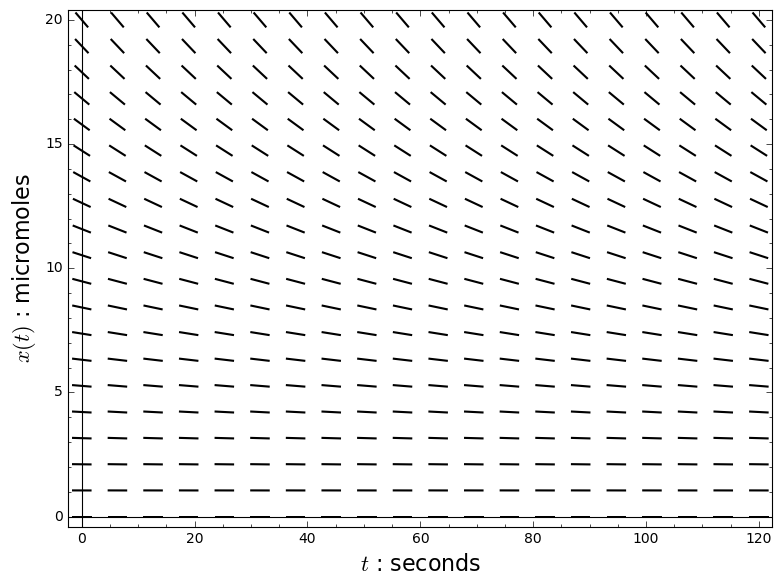

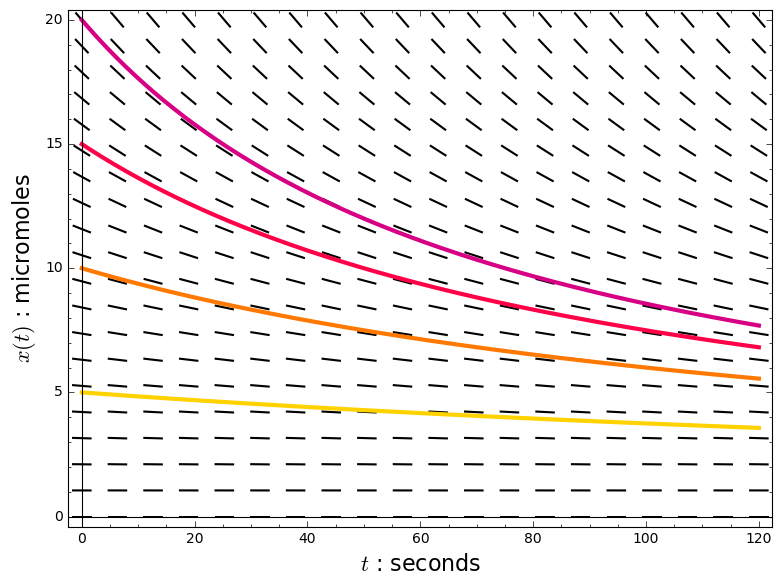

In [47]:
NO_direction = plot_slope_field(-2*(7e-9)*(1e6/21) * x^2, (t, 0, 120), (x, 0, 20))
NO_solutions = [plot(1 / (1/(5*k) + 2*(7e-9)*(1e6/21)*t), (t, 0, 120), thickness = 3, rgbcolor = palette[4-k]) for k in range(1, 5)]
NO_labels = ["$t$ : seconds", "$x(t)$ : micromoles"]
show(NO_direction, axes_labels = NO_labels)
show(NO_direction + sum(NO_solutions), axes_labels = NO_labels)

## "On the nature of the function expressive of the law of human mortality"

In the late 1700s, a group of 5400 kids in Northampton, England got signed up for life insurance when they were 15 years old. The insurance company kept track of $n(t)$, the number who were still alive at age $t$. In the early 1800s, an actuary named Benjamin Gompertz noticed that the equation

$$n'(t) = -\tfrac{1}{120} e^{t/40} n(t)$$

described $n$ pretty well. Use this equation to work out how many of the kids were still alive at age 60.

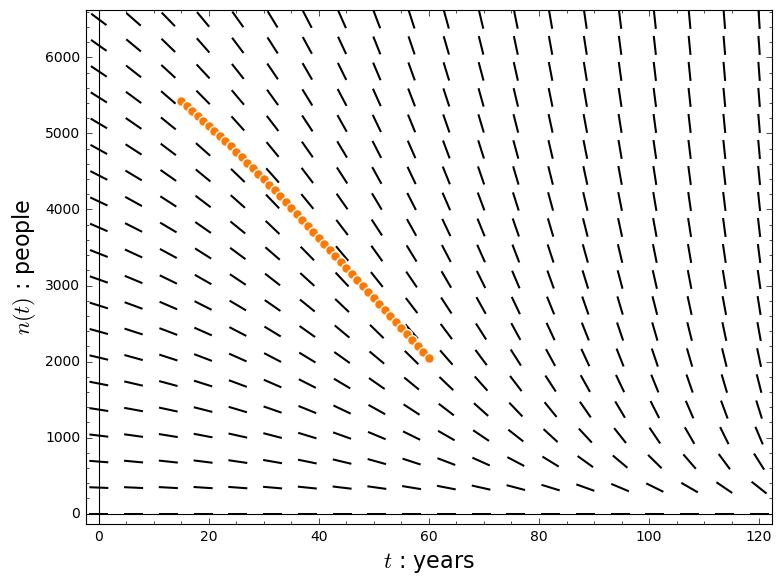

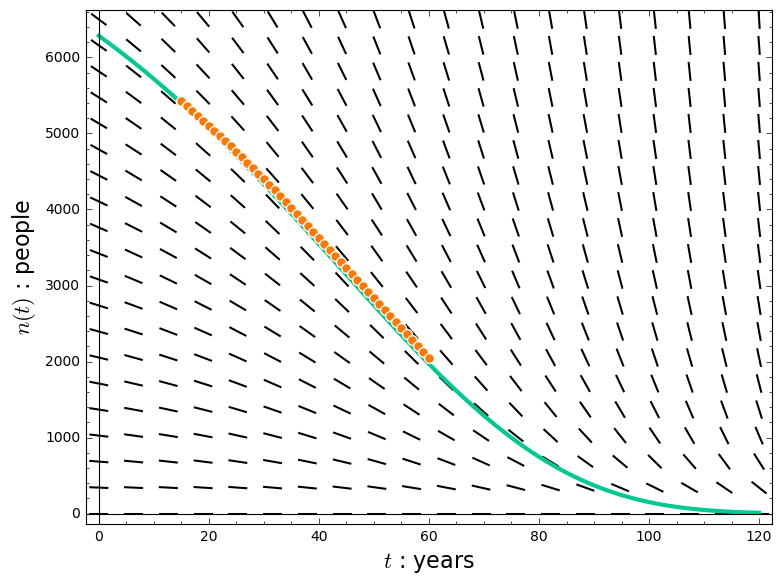

In [57]:
life_direction = plot_slope_field(-(1/120)*exp(t/40)*n, (t, 0, 120), (n, 0, 6500))
life_solution = plot(life_model.substitute(c = 5400, r = 1/3, s = 40), (t, 0, 120), thickness = 3, rgbcolor = cool_palette[1])
life_labels = ["$t$ : years", "$n(t)$ : people"]
show(life_direction + life_scatter, axes_labels = life_labels)
show(life_direction + life_scatter + life_solution, axes_labels = life_labels)

{c: 5422.634393869664, s: 38.65706335927828, r: 0.2992855220264365}


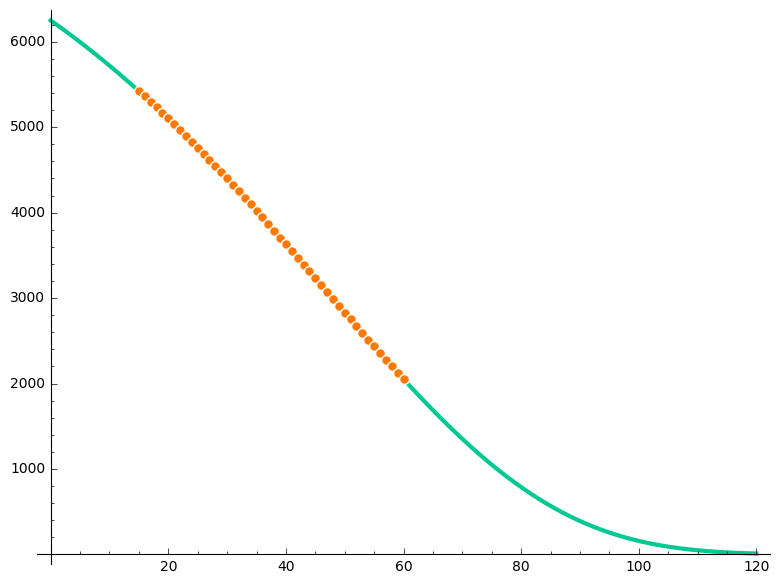

In [3]:
life_data = zip(range(15, 61), [5423, 5360, 5297, 5233, 5168, 5102, 5036, 4969, 4899, 4830, 4762, 4689, 4616, 4545, 4472, 4403, 4325, 4250, 4174, 4098, 4021, 3944, 3866, 3788, 3709, 3630, 3551, 3473, 3392, 3312, 3235, 3152, 3072, 2991, 2911, 2831, 2752, 2672, 2593, 2514, 2436, 2358, 2280, 2206, 2123, 2052])
life_scatter = scatter_plot(life_data, edgecolor = (1, 1, 1), facecolor = palette[2])
c, r, s = var('c r s')
life_model(t) = c * exp(r*exp(15/s)) * exp(-r*exp(t/s))
fit = find_fit(life_data, life_model, parameters = [c, r, s], initial_guess = (5423, 1/3, 40), solution_dict = True)
print(fit)
life_scatter + plot(life_model.substitute(fit), (t, 0, 120), thickness = 3, rgbcolor = cool_palette[1])

In [4]:
print(life_model.substitute(t = 60, c = 5400, r = 1/3, s = 40).n())
print(life_model.substitute(t = 100, c = 5400, r = 1/3, s = 40).n())
print(life_model.substitute(t = 120, c = 5400, r = 1/3, s = 40).n())

1968.94867935320
151.157153992760
10.8479095840813


## A hole in a water tank

Uh-oh! The pipe came loose from the bottom of that water tank, and the water is rushing out. Because the pipe's resistance is gone, the flow rate depends on the pressure in the tank differently than before: it's proportional to the square root of the pressure. (This assumption is based on "Bernoulli's principle," which describes flow with very little resistance.) Let's say the flow rate is related to the water level by the equation

$$y'(t) = -\tfrac{1}{10} y(t)^{1/2}.$$

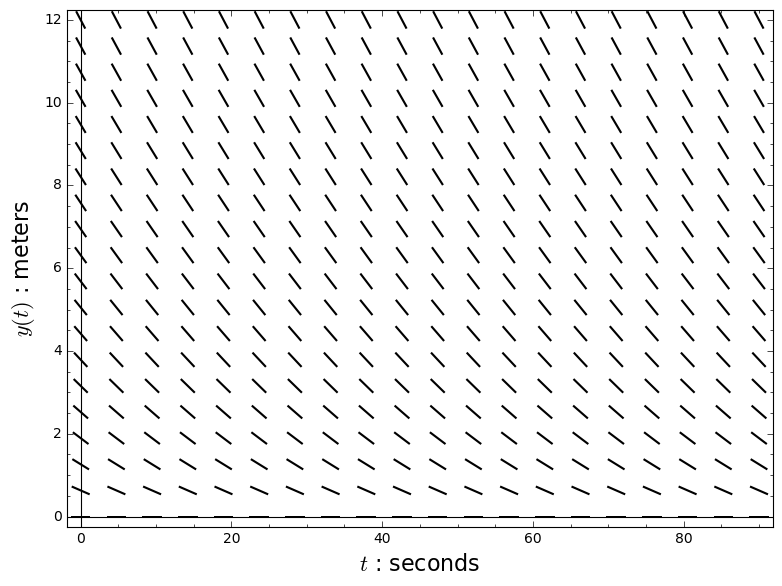

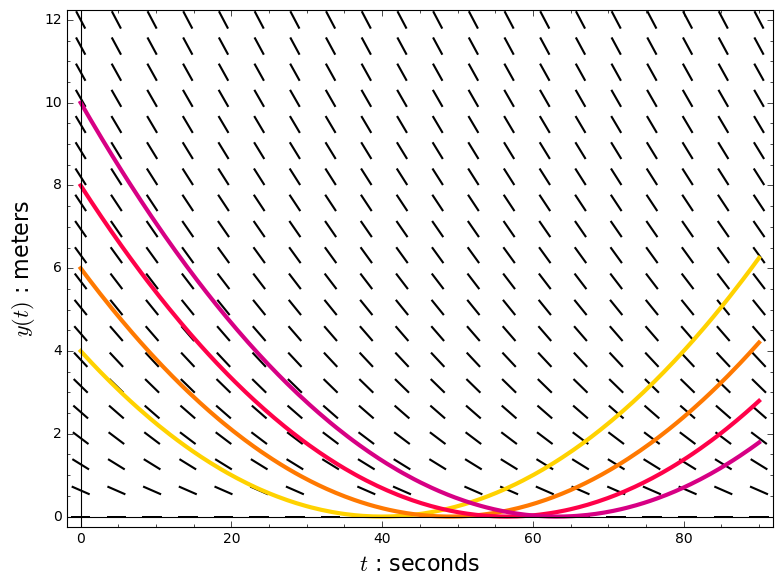

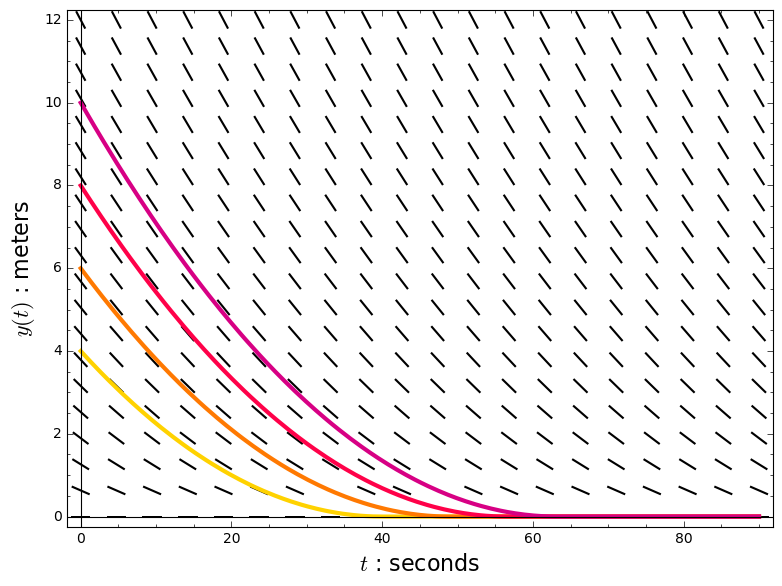

In [109]:
spout_direction = plot_slope_field(-(1/10)*sqrt(y), (t, 0, 90), (y, 0, 12))
bad_spout_solutions = [plot((sqrt(2*k) - t/20)^2, (t, 0, 90), thickness = 3, rgbcolor = palette[5-k]) for k in range(2, 6)]
spout_solutions = [plot(piecewise([((0, 20*sqrt(2*k)), (sqrt(2*k) - t/20)^2), ((20*sqrt(2*k), infinity), 0)]), (t, 0, 90), thickness = 3, rgbcolor = palette[5-k]) for k in range(2, 6)]
water_labels = ["$t$ : seconds", "$y(t)$ : meters"]
show(spout_direction, axes_labels = water_labels)
show(spout_direction + sum(bad_spout_solutions), axes_labels = water_labels)
show(spout_direction + sum(spout_solutions), axes_labels = water_labels)

## Closing a hole in a water tank

Fortunately, the water tank has an emergency shut-off valve that you can use to close the hole where the pipe was attached. You start closing the valve at the moment the pipe comes loose, and it will take you 60 seconds to close the valve completely. As the valve closes, the flow rate decreases proportionally, so the flow rate is related to the water level by the equation

$$y'(t) = -\tfrac{1}{10} (1 - \tfrac{1}{60} t)\,y(t)^{1/2}.$$

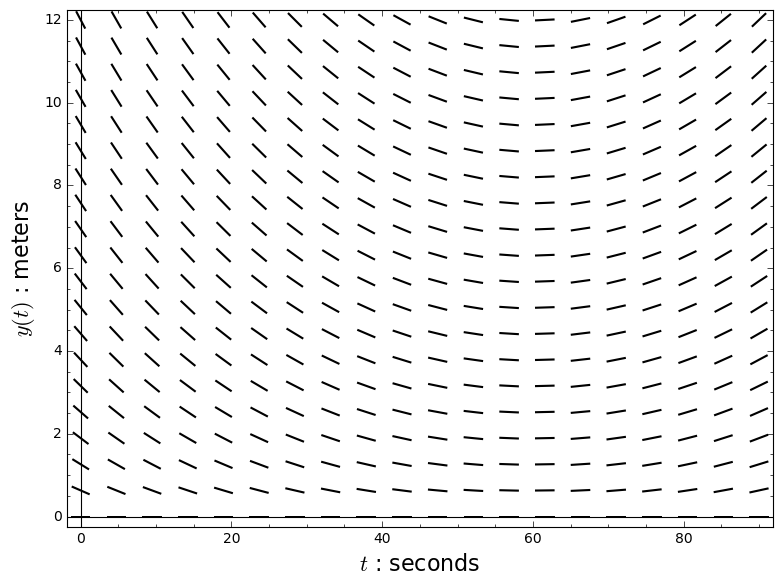

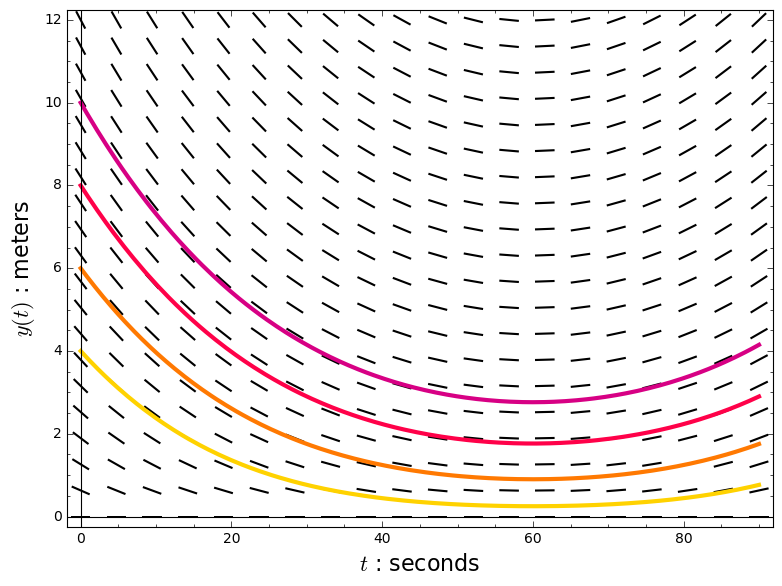

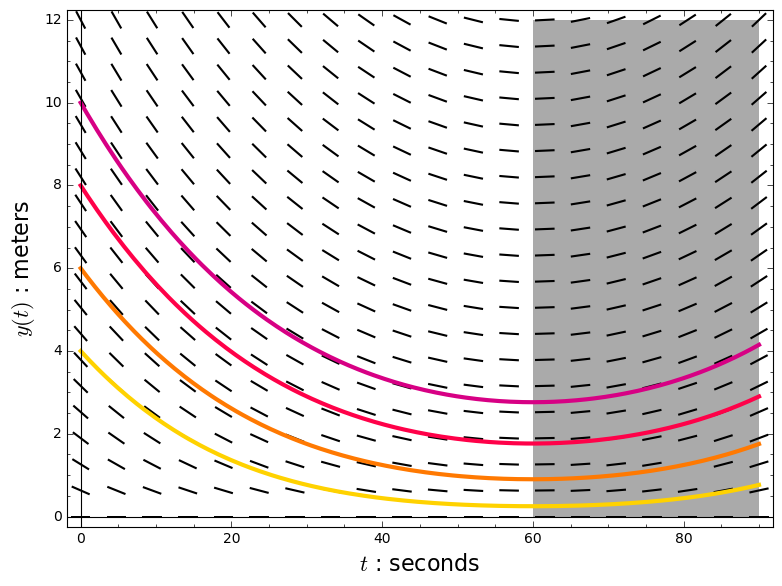

In [111]:
closing_direction = plot_slope_field(-(1/10)*(1 - t/60)*sqrt(y), (t, 0, 90), (y, 0, 12))
closing_solutions = [plot((sqrt(2*k) - t*(1 - t/120)/20)^2, (t, 0, 90), thickness = 3, rgbcolor = palette[5-k]) for k in range(2, 6)]
invalid_region = polygon([(60, 0), (90, 0), (90, 12), (60, 12)], color = (2/3, 2/3, 2/3), zorder = 0)
water_labels = ["$t$ : seconds", "$y(t)$ : meters"]
show(closing_direction, axes_labels = water_labels)
show(closing_direction + sum(bad_closing_solutions), axes_labels = water_labels)
show(closing_direction + sum(bad_closing_solutions) + bad_region, axes_labels = water_labels, aspect_ratio = 'automatic')